In [1]:
import courses
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [78]:
args = {"prof_fn":"Cheng", "prof_ln":"Chin"}

each bar is actually one of the entries in the list  
which means that weirdly enough i need to itercolumns or something?

In [101]:
def df_maker(args_from_ui, sentiment_or_score, graph_type):
    '''
    Where graph_type is "prof" or "course"
    '''
    prof_df, dept_df, dept = courses.find_courses(args_from_ui)
    small_df, year = get_small_df(prof_df, graph_type)
    small_df.dropna(axis = (1), how = "all", inplace = True)
    if sentiment_or_score == "sentiment":
        columns_not_to_graph = ['course_id', 
                                'low_time', 
                                'avg_time', 
                                'high_time', 
                                'fn', 
                                'ln', 
                                'year', 
                                'num_responses', 
                                'prof_score', 
                                'ass_score', 
                                'test_score']
    if sentiment_or_score == "score":
        columns_not_to_graph = ['course_id', 
                                'low_time', 
                                'avg_time', 
                                'high_time', 
                                'fn', 
                                'ln', 
                                'year', 
                                'num_responses', 
                                'inst_sentiment', 
                                'course_sentiment']
    columns = list(small_df.columns)
    graph_columns = list(set(columns).difference(columns_not_to_graph))
    small_df = small_df[graph_columns]

    #first get the average of scores
    continuous_df = small_df.groupby(['course']).mean()
    compare_to_dept_columns = list(continuous_df.columns)
    dept_df = dept_df[compare_to_dept_columns].mean()
    dept_df.rename(index = dept, inplace = True)
    continuous_df = continuous_df.append(dept_df)
    
    return continuous_df

In [99]:
def prof_score_graph(args_from_ui):
    continuous_df = df_maker(args_from_ui, "score", "prof")
    graph_from_df(continuous_df)
    
def prof_sentiment_graph(args_from_ui):
    continuous_df = df_maker(args_from_ui, "sentiment", "prof")
    graph_from_df(continuous_df)
    
def course_sentiment_graph(args_from_ui):
    continuous_df = df_maker(args_from_ui, "sentiment", "course")
    graph_from_df(continuous_df)
    
def course_score_graph(args_from_ui):
    continuous_df = df_maker(args_from_ui, "score", "course")
    graph_from_df(continuous_df)

def graph_from_df(continuous_df):
    n = continuous_df.shape[0]
    ind = np.arange(n)
    width = 0.1  
    offset = 0
    plt.figure(figsize = (20, 7))
    bars = []
    for column in continuous_df:
        bar = plt.bar(x = ind - (offset * width), width=width, height=continuous_df[column])
        offset += 1
        bars.append(bar)
    xnames = list(continuous_df.axes[0])
    plt.xticks(ind, xnames, rotation = 20, fontsize = 10, ha = 'right')
    plt.legend(bars, continuous_df.axes[1])
    plt.show()

    
def get_small_df(dataframe, prof_or_course):
    current_year = 2018
    timespan = 5
    if prof_or_course == "prof":
        while dataframe.course.unique().shape[0] > 10:
            timespan -= 1
            dataframe = dataframe[dataframe.year >= current_year - timespan]
        dataframe = dataframe.groupby(['course']).mean()

    if prof_or_course == "course":
        while dataframe.groupby(['fn', 'ln']).mean().shape[0] > 10:
            timespan -= 1
            dataframe = dataframe[dataframe.year >= current_year - timespan]
        dataframe = dataframe.groupby(['fn', 'ln']).mean()


    return dataframe, current_year - timespan

In [96]:
def more_prof_graphs(args_from_ui):
    prof_score_graph(args_from_ui)
    prof_sentiment_graph(args_from_ui)

PHYS


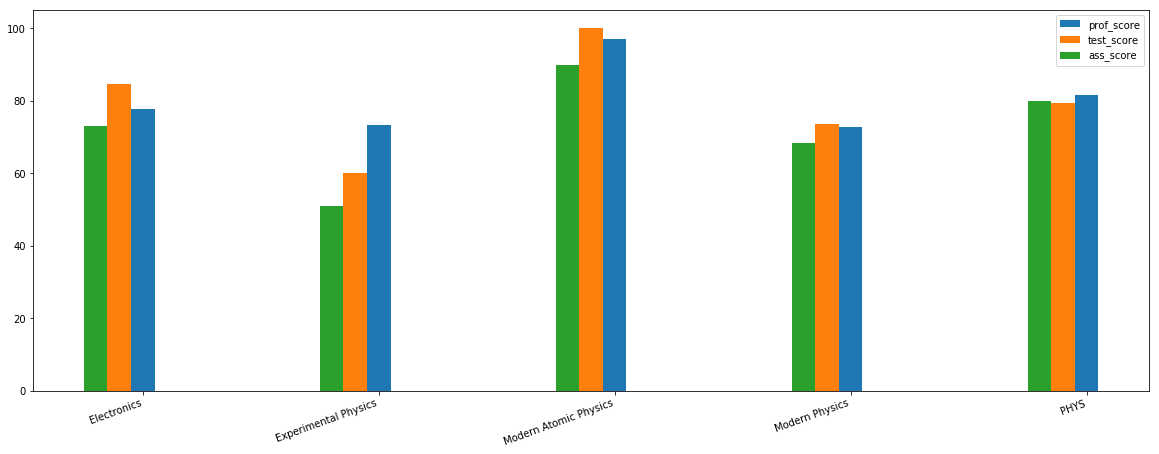

PHYS


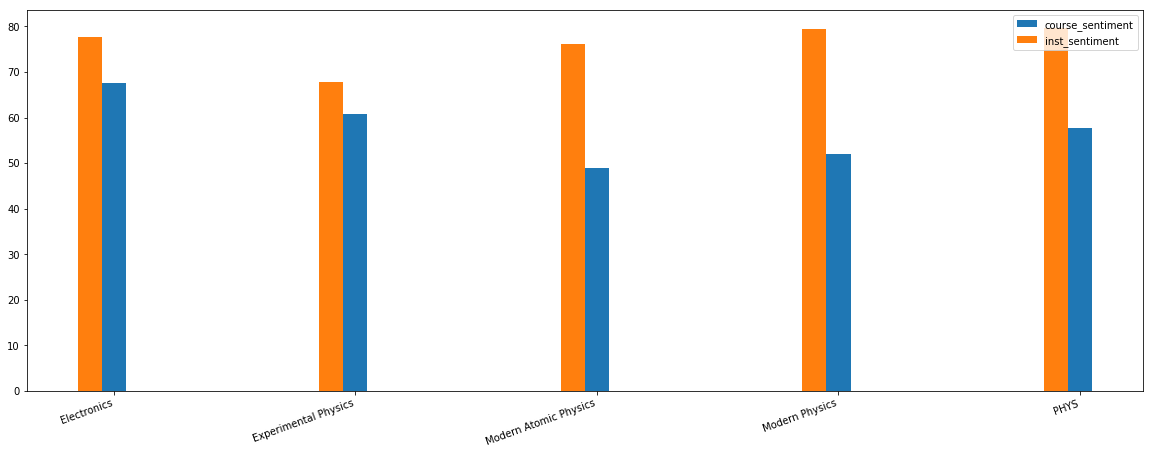

In [97]:
more_prof_graphs(args)

In [98]:
args = {"dept":"STAT", "course_num":"25100"}

In [102]:
course_sentiment_graph(args)

ValueError: not enough values to unpack (expected 3, got 2)